In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
import folium
import pickle
from sodapy import Socrata
from datetime import datetime


%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
params = {'$limit': 41177, 'query_text': 'fire', 'year': 2016}

In [4]:
response = requests.get(endpoint, params = params)

In [5]:
response

<Response [200]>

In [6]:
res = response.json()

In [7]:
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [8]:
fire = pd.DataFrame(res)
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   12 non-null     object
 1   year         12 non-null     object
 2   query_count  12 non-null     object
 3   query_text   12 non-null     object
dtypes: object(4)
memory usage: 512.0+ bytes


In [9]:
dates = []
for index_value, row_value in fire.iterrows():
    if row_value['month_name'] == "January":
        month = 1
    elif row_value['month_name'] == "February":
        month = 2
    elif row_value['month_name'] == "March":
        month = 3
    elif row_value['month_name'] == "April":
        month = 4
    elif row_value['month_name'] == "May":
        month = 5
    elif row_value['month_name'] == "June":
        month = 6
    elif row_value['month_name'] == "July":
        month = 7
    elif row_value['month_name'] == "August":
        month = 8
    elif row_value['month_name'] == "September":
        month = 9
    elif row_value['month_name'] == "October":
        month = 10
    elif row_value['month_name'] == "November":
        month = 11
    elif row_value['month_name'] == "December":
        month = 12
    datestring = str(str(month) + '-' + row_value['year'])
    dt = datetime.strptime(datestring, '%m-%Y')
    dates += [dt]
type(dates[0])

datetime.datetime

In [10]:
fire['date'] = dates

In [11]:
fire['query_count'] = fire['query_count'].astype('int')

Text(0.5, 1.0, "Searches for 'fire' by Month")

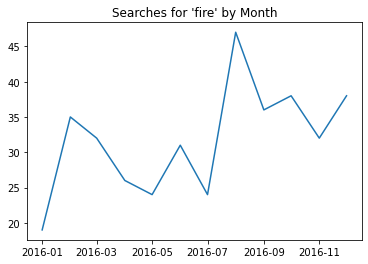

In [12]:
fire = fire.sort_values('date')
plt.plot('date', 'query_count', data = fire)
plt.title("Searches for 'fire' by Month")

In [13]:
fire.sort_values('query_count', ascending = False)

,month_name,year,query_count,query_text,date
7,August,2016,47,fire,2016-08-01
9,October,2016,38,fire,2016-10-01
11,December,2016,38,fire,2016-12-01
8,September,2016,36,fire,2016-09-01
1,February,2016,35,fire,2016-02-01
2,March,2016,32,fire,2016-03-01
10,November,2016,32,fire,2016-11-01
5,June,2016,31,fire,2016-06-01
3,April,2016,26,fire,2016-04-01
4,May,2016,24,fire,2016-05-01


### August 2016 had most searches with 47